In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

Matplotlib created a temporary config/cache directory at /var/folders/th/4wk9mg4j3674pkjtsrtmfmzh0000gn/T/matplotlib-0jf6c8lz because the default path (/Users/shikharanand/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
iris = fetch_openml(name='iris')

/Users/shikharanand/Anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:373: UserWarning: Multiple active versions of the dataset matching the name iris exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

In [6]:
np.unique(iris.target)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
iris.DESCR

"**Author**: R.A. Fisher  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Iris) - 1936 - Donated by Michael Marshall  \n**Please cite**: [UCI Citation Policy](https://archive.ics.uci.edu/ml/citation_policy.html)  \n\n**Iris Plants Database**  \nThis is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is     linearly separable from the other 2; the latter are NOT linearly separable from each other.\n\nPredicted attribute: class of iris plant.  \nThis is an exceedingly simple domain.  \n \n### Attribute Information:\n    1. sepal length in cm\n    2. sepal width in cm\n    3. petal length in cm\n    4. petal width in cm\n    5. class: \n       -- Iris Setosa\n       -- Iris Versicolour\n       -- Iris Virginica\n\n

In [8]:
iris.details

{'id': '61',
 'name': 'iris',
 'version': '1',
 'format': 'ARFF',
 'creator': 'R.A. Fisher',
 'collection_date': '1936',
 'upload_date': '2014-04-06T23:23:39',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/61/iris.arff',
 'file_id': '61',
 'default_target_attribute': 'class',
 'version_label': '1',
 'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html',
 'tag': ['study_1',
  'study_25',
  'study_4',
  'study_41',
  'study_50',
  'study_52',
  'study_7',
  'study_86',
  'study_88',
  'study_89',
  'uci'],
 'visibility': 'public',
 'original_data_url': 'https://archive.ics.uci.edu/ml/datasets/Iris',
 'paper_url': 'http://digital.library.adelaide.edu.au/dspace/handle/2440/15227',
 'status': 'active',
 'processing_date': '2020-11-20 19:02:18',
 'md5_checksum': 'ad484452702105cbf3d30f8deaba39a9'}

### Converting numpy array to pandas dataframe

In [9]:
iris.data.shape

(150, 4)

In [10]:
iris.target.shape

(150,)

In [11]:
X_df = pd.DataFrame(data=iris.data,    # values
                    index=np.array(range(1,151)),    # 1st column as index
                    columns=np.array(range(1,5)))  # 1st row as the column names

In [12]:
X_df.head()

,1,2,3,4
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [13]:
y_df = pd.DataFrame(data=iris.target,    # values
                    index=np.array(range(1,151)),    # 1st column as index
                    columns=np.array(range(1,2)))  # 1st row as the column names

In [14]:
y_df.head()

,1
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa


In [15]:
y_df[1].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
y_df[1] = y_df[1].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2])

In [17]:
y_df

,1
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2
149,2


Text(0, 0.5, 'Sepal Width')

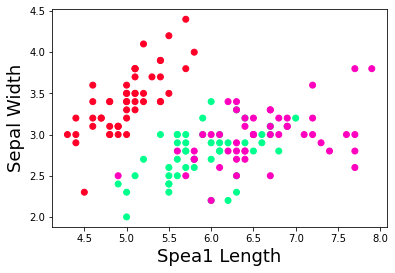

In [18]:
plt.scatter(X_df.iloc[:,0], X_df.iloc[:,1], c=y_df.iloc[:,0], cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

### Training Dataset

In [19]:
kmeans_kwargs = {"n_init": 10, "max_iter": 300, "random_state": 42}

### Silhouette coefficient

In [20]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_df)
    score = silhouette_score(X_df, kmeans.labels_)
    silhouette_coefficients.append(score)

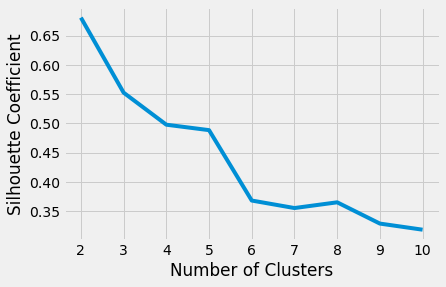

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [22]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_df)
    sse.append(kmeans.inertia_)

In [23]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

### We have k=3

In [24]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(X_df)

KMeans(n_clusters=3, random_state=42)

In [25]:
new_labels = kmeans.labels_
print(new_labels)
type(new_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


numpy.ndarray

In [26]:
# Converting ndaray to df
new_labels_df = pd.DataFrame(data=new_labels,    # values
                    index=np.array(range(1,151)),    # 1st column as index
                    columns=np.array(range(1,2)))  # 1st row as the column names

Text(0.5, 1.0, 'Predicted')

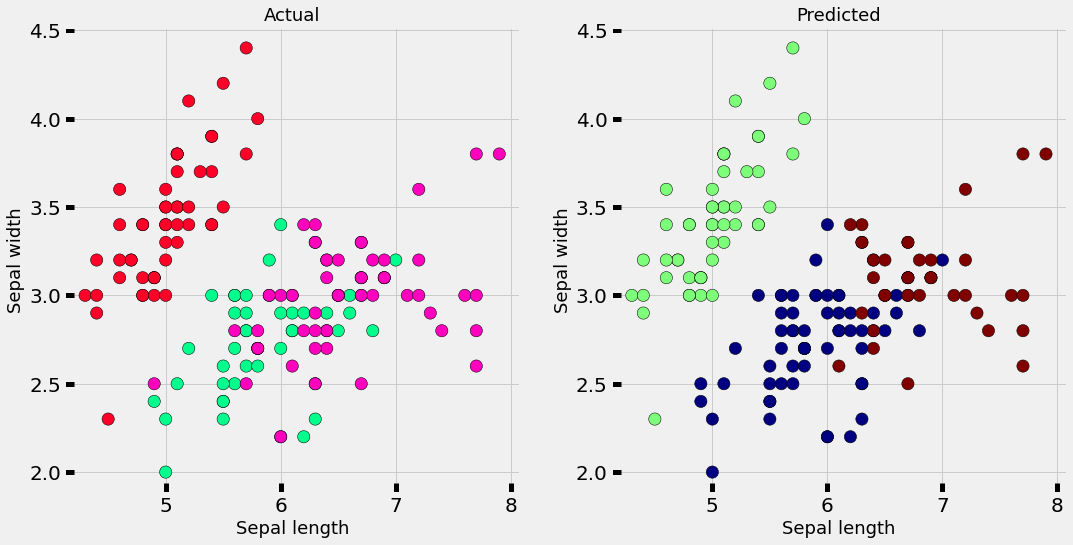

In [27]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_df.iloc[:, 0], cmap='gist_rainbow', edgecolor='k', s=150)

axes[1].scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=new_labels_df.iloc[:, 0], cmap='jet', edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

### F1 Score

In [42]:
f1s = f1_score(y_df, new_labels_df, average='weighted')
print(f1s*100)

27.27272727272727


### Adjust Rand Score

In [29]:
ars= adjusted_rand_score(y_df.iloc[:,0], new_labels_df.iloc[:,0])
print(ars*100)

73.02382722834697


### Feature Scaling or Standardization

In [30]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_df)

In [31]:
scaled_features

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [32]:
# Converting ndaray to df
new_scaled_features_df = pd.DataFrame(data=scaled_features,    # values
                    index=np.array(range(1,151)),    # 1st column as index
                    columns=np.array(range(1,5)))  # 1st row as the column names

In [33]:
new_scaled_features_df

,1,2,3,4
1,-0.900681,1.032057,-1.341272,-1.312977
2,-1.143017,-0.124958,-1.341272,-1.312977
3,-1.385353,0.337848,-1.398138,-1.312977
4,-1.506521,0.106445,-1.284407,-1.312977
5,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
146,1.038005,-0.124958,0.819624,1.447956
147,0.553333,-1.281972,0.705893,0.922064
148,0.795669,-0.124958,0.819624,1.053537
149,0.432165,0.800654,0.933356,1.447956


In [34]:
kmeans.fit(new_scaled_features_df)

KMeans(n_clusters=3, random_state=42)

In [35]:
new_scaled_labels = kmeans.labels_
print(new_scaled_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [36]:
# Converting ndaray to df
new_scaled_labels_df = pd.DataFrame(data=new_scaled_labels,    # values
                                    index=np.array(range(1,151)),    # 1st column as index
                                    columns=np.array(range(1,2)))  # 1st row as the column names

In [37]:
type(new_scaled_labels_df)

pandas.core.frame.DataFrame